In [1]:
import sys
sys.path.append('core')

import argparse
import os
import cv2
import glob
import numpy as np
import torch
from PIL import Image

from raft import RAFT
from utils import flow_viz
from utils.utils import InputPadder
import cv2
import os

from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [55]:
def plot_cv(cv_at_p, range=None):
    figure = plt.figure(figsize=(24, 16), dpi=80)
    # ax = Axes3D(figure)
    # h, w = cv_at_p.shape
    # yy, xx = np.arange(0, h), np.arange(0, w)
    # xx, yy = np.meshgrid(xx, yy)
    # ax.plot_surface(xx, yy, cv_at_p)
    if range is None:
        plt.imshow(cv_at_p)
    else:
        plt.imshow(cv_at_p, vmin=range[0], vmax=range[1])
    plt.colorbar()
    plt.show()
    # plt.close()

In [61]:
import argparse
args = argparse.Namespace()
args.small = False
# args.mixed_precision = False
args.mixed_precision = True
raft = RAFT(args)
path2 = '/mnt/lustre/syli/AnimeRun/flow/method/RAFT-master-official/RAFT/checkpoints/100000_raft-mixed-things-anime-all.pth'
path2 = '/mnt/lustre/syli/AnimeRun/flow/method/RAFT-master-official/RAFT/models/raft-sintel.pth'
dict3 = torch.load(path2)
dict4 = dict()
for key in dict3:
    dict4[key[7:]] = dict3[key]
raft.load_state_dict(dict4, strict=False)
raft.cuda()

RAFT(
  (fnet): BasicEncoder(
    (norm1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (relu1): ReLU(inplace=True)
    (layer1): Sequential(
      (0): ResidualBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu): ReLU(inplace=True)
        (norm1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (norm2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      )
      (1): ResidualBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu): ReLU(inplace=True)
        (norm1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=Fa

(544, 968, 3)


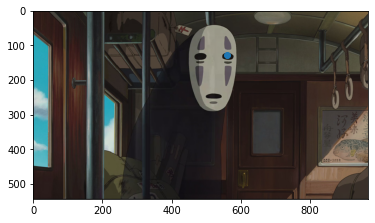

In [62]:
def load_image(imfile):
    img = np.array(Image.open(imfile)).astype(np.uint8)
    img = torch.from_numpy(img).permute(2, 0, 1).float()
    return img[None].cuda()

folder = '/mnt/lustre/syli/AnimeRun/interp/data/datasets/test_2k_540p/Japan_v2_3_142838_s3'
image1 = load_image(os.path.join(folder, 'frame1.png'))
image2 = load_image(os.path.join(folder, 'frame3.png'))

N, C, H, W = image1.size()
H8 = (H // 8 + 1) * 8
W8 = (W // 8 + 1) * 8
image1x = torch.nn.functional.interpolate(image1, size=(H8, W8))
image2x = torch.nn.functional.interpolate(image2, size=(H8, W8))
# print(image1x.type())
figure = plt.figure()
print(image1x[0].permute(1, 2, 0).data.cpu().numpy().shape)
plt.imshow(image1x[0].permute(1, 2, 0).data.cpu().numpy()/255)
plt.scatter([560//8*8], [128//8*8])
plt.show()

torch.Size([1, 3, 544, 968]) torch.Size([1, 3, 544, 968])


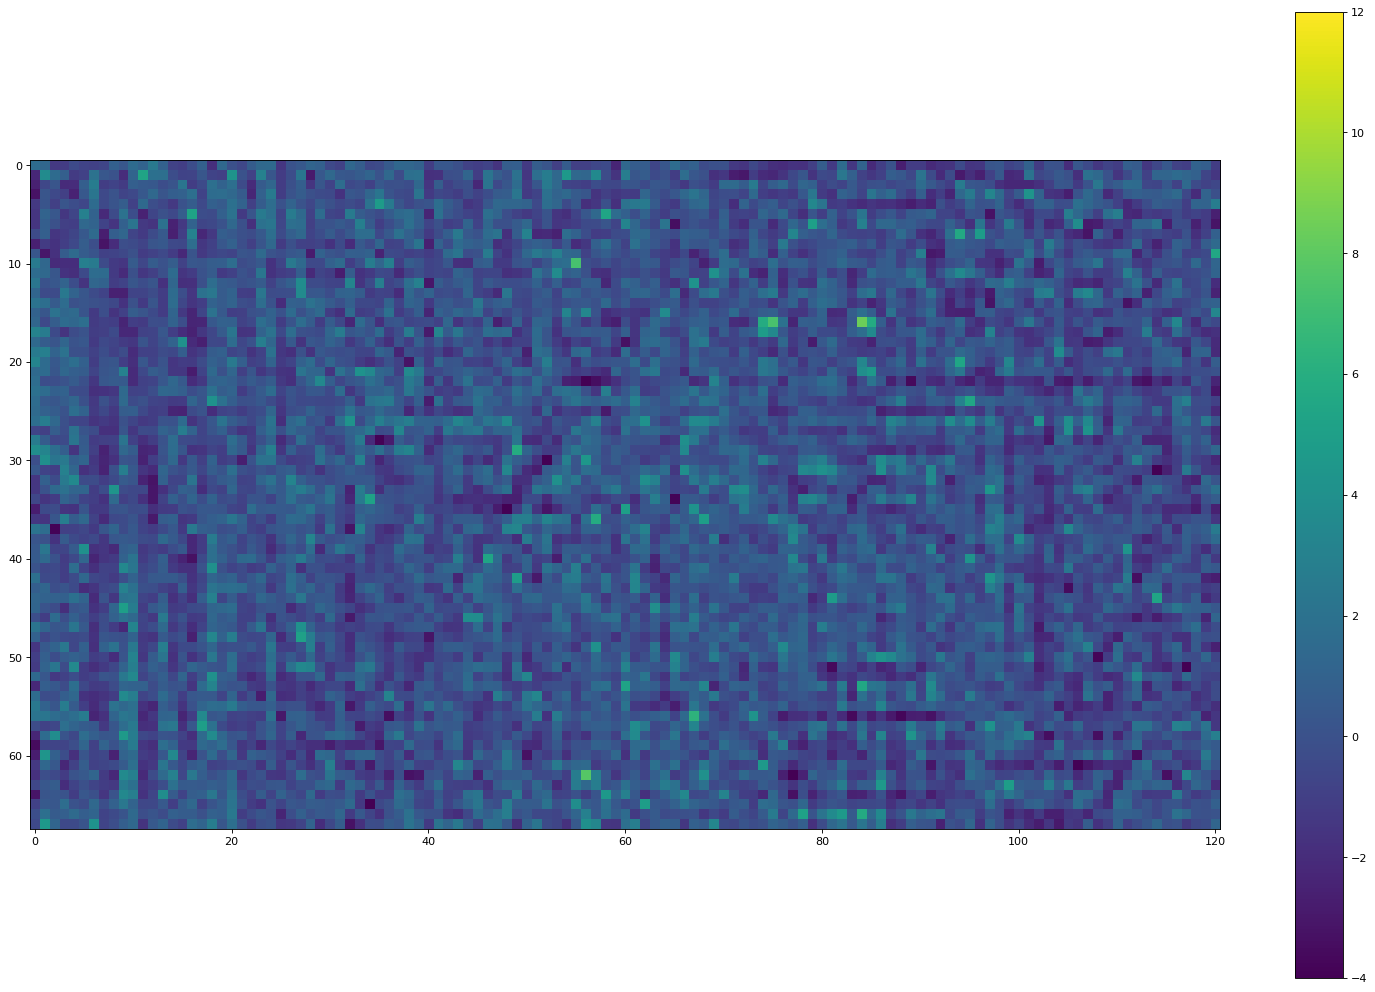

In [63]:
cv_p = raft.vis_cost_volume_at(image1x.float(), image2x.float(), [560//8, 128//8])
plot_cv(cv_p, [-4, 12])

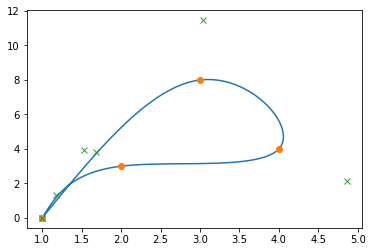